Pythonで幾何ブラウン運動（Geometric Brownian Motion, GBM）をシミュレーションするコードです。

GBMは、株価モデルや金融工学でよく使われる確率過程で、以下の確率微分方程式に従います。


$
dS_{t} = \mu S_{t}dt + \sigma S_{t}dW_{t}
$

$
S_{t}
$
:資産価格

$
\mu
$
:ドリフト（平均的な成長率）

$
\sigma
$
:ボラティリティ（変動率）

$
W_{t}
$
​:はウィーナー過程（標準ブラウン運動）

Pythonでこれをシミュレーションするには、離散的な時間ステップでオイラー・マルヤマ法を用いて数値解を求めます。

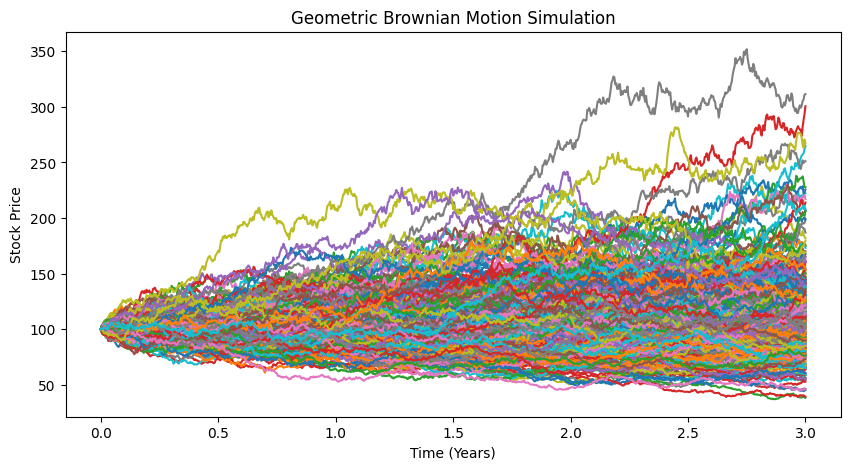

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def geometric_brownian_motion(S0, mu, sigma, T, dt, N):
    """
    幾何ブラウン運動をシミュレーションする関数
    :param S0: 初期価格
    :param mu: ドリフト（平均リターン）
    :param sigma: ボラティリティ（標準偏差）
    :param T: 期間（年）
    :param dt: タイムステップ（刻み幅）
    :param N: シミュレーションのパス数
    :return: 時系列データ
    """
    t = np.arange(0, T + dt, dt)
    M = len(t)  # ステップ数
    
    S = np.zeros((N, M))
    S[:, 0] = S0  # 初期値設定
    
    for i in range(1, M):
        # 以下の部分がオイラー・マルヤマ法を使ってGBMをシミュレーションしている箇所
        dW = np.random.normal(0, np.sqrt(dt), size=N)  # 標準正規分布に従う乱数
        S[:, i] = S[:, i-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * dW)
    
    return t, S

# パラメータ設定
S0 = 100   # 初期価格
mu = 0.05  # ドリフト（5%の成長率）
sigma = 0.2  # ボラティリティ（20%）
T = 3  # 1年間
dt = 1/252  # 1日刻み（252営業日）
N = 300  # シミュレーションする軌跡の数

# シミュレーション実行
t, S = geometric_brownian_motion(S0, mu, sigma, T, dt, N)

# プロット
plt.figure(figsize=(10, 5))
for i in range(N):
    plt.plot(t, S[i], label=f'Path {i+1}')
plt.xlabel("Time (Years)")
plt.ylabel("Stock Price")
plt.title("Geometric Brownian Motion Simulation")
# plt.legend()
plt.show()


# オイラー・マルヤマ法とは？

オイラー・マルヤマ法（Euler-Maruyama method）は、確率微分方程式（SDE: Stochastic Differential Equation）を数値的に解くための方法です。通常のオイラー法を拡張し、確率過程のノイズ（ウィーナー過程）を考慮している点が特徴です。

幾何ブラウン運動は以下の形

$
dS_{t} = \mu S_{t}dt + \sigma S_{t}dW_{t}
$

これを離散化すると、オイラー・マルヤマ法では次のような差分方程式になる。

$
S_{t+\Delta t} = S_{t} + \mu S_{t}\Delta t + \sigma S_{t}\Delta W_{t}
$

この数式は、GBMの厳密解である指数解形式：

$
S_{t+\Delta t} = S_t \times \exp \left( (\mu - \frac{1}{2} \sigma^2) \Delta t + \sigma \Delta W_t \right)
$
に基づいており、オイラー・マルヤマ法を改良した形（対数正規モデル）になっています。

基本的なオイラー・マルヤマ法の更新式：

$
S_{t+\Delta t} = S_{t} + \mu S_{t}\Delta t + \sigma S_{t}\Delta W_{t}
$

をそのまま使う場合、数値的不安定性が発生することがあるため、このコードでは対数を取った指数形式で計算しています。

# まとめ
- オイラー・マルヤマ法は、確率微分方程式を離散化して数値的に解く方法。
- コードでは、ウィーナー過程の増分 dW を標準正規乱数で近似し、更新式に適用している。
- ただし、幾何ブラウン運動の性質を考慮し、指数形式で更新することで数値的安定性を向上させている。